Iterations Completed!


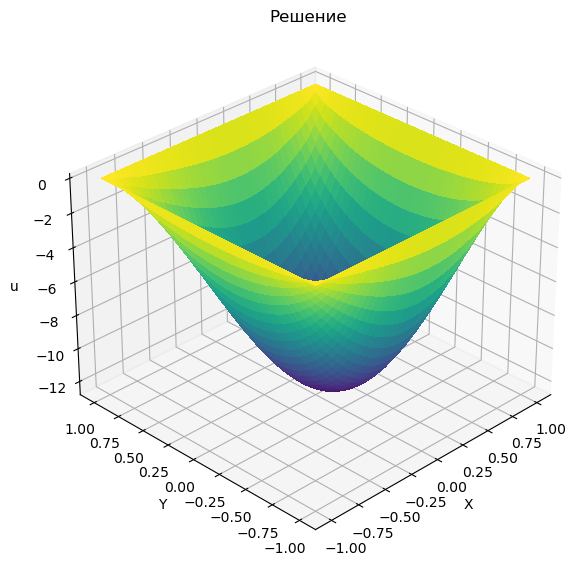

In [1]:
import numpy                                
from matplotlib import pyplot, cm           
from mpl_toolkits.mplot3d import Axes3D    


nx = 40            
ny = 40       

iteration = 1000




xmin = -1
xmax = 1
ymin = -1
ymax = 1

dx = (xmax - xmin) / (nx - 1)         
dy = (ymax - ymin) / (ny - 1)

#b = -(10/x^2+1)*(2+6y)

p = numpy.zeros((ny,nx))
pd = numpy.zeros((ny,nx))
b = numpy.zeros((ny,nx))              
x = numpy.linspace(xmin,xmax,nx)
y = numpy.linspace(ymin,ymax,ny)


X, Y = numpy.meshgrid(x, y) 


i = 0
xx = numpy.linspace(-1,1,40)
yy = numpy.linspace(-1,1,40)
for q in xx:
    q = 10*(2+6*i/40)/(q**2+1)
    xx[i] = q
    i+=1
Xx, Yy = numpy.meshgrid(xx, yy) 
b = Xx


#Решение

for it in range(iteration):
    
    pd = p.copy()

    #Дискретизация второго порядка

    p[1:-1,1:-1] = (((pd[1:-1,2:] + pd[1:-1,:-2])*dy**2 + (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2
                     - b[1:-1,1:-1]*dx**2 * dy**2) / (2*(dx**2 + dy**2)))

    #Граничные условия
    
    p[0,:] = 0
    p[ny-1,:] = 0
    p[:,0] = 0
    p[:,nx-1] = 0
    
print("Iterations Completed!")


def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    
    X, Y = numpy.meshgrid(x, y) 
    
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_title('Решение')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u')
    
plot2D(x,y,p)
pyplot.show()